<a href="https://colab.research.google.com/github/Shivp55/DAML/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3746 files belonging to 2 classes.
Found 1640 files belonging to 2 classes.
Found 1305 files belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.5541 - loss: 13.4036 - val_accuracy: 0.3854 - val_loss: 0.7210
Epoch 2/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6825 - loss: 0.6690 - val_accuracy: 0.3854 - val_loss: 0.7945
Epoch 3/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6837 - loss: 0.6259 - val_accuracy: 0.3854 - val_loss: 0.8621
Epoch 4/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7067 - loss: 0.6074 - val_accuracy: 0.3854 - val_loss: 0.8584
Epoch 5/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6902 - loss: 0.6186 - val_accuracy: 0.3854 - val_loss: 0.8735
Epoch 6/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6937 - loss: 0.6168 - val_accuracy: 0.3854 - val_loss: 0.8678
Epoch 7/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7054 - loss: 0.6070 - val_accuracy: 0.3854 - val_loss: 0.8651
Epoch 8/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6975 - loss: 0.6127 - val_ac

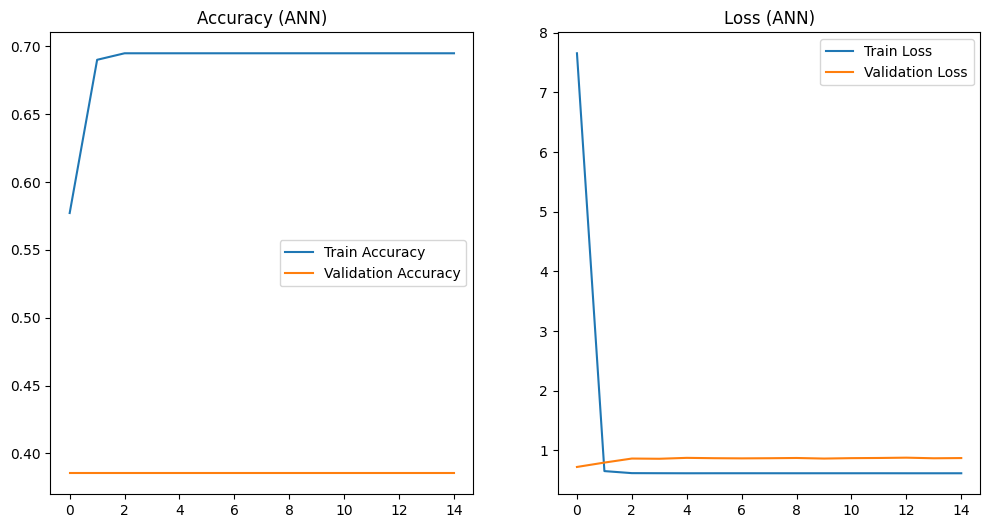

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       979
           1       0.25      1.00      0.40       326

    accuracy                           0.25      1305
   macro avg       0.12      0.50      0.20      1305
weighted avg       0.06      0.25      0.10      1305



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import os

batch_size = 32
img_height, img_width = 224, 224
from google.colab import drive
drive.mount('/content/drive')
base_dir = "/content/drive/MyDrive/ML/Dataset 3/Mars Surface Images Dataset/Mars Surface Dataset/dataset/"

train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'validation'),
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Flatten images for ANN input
def preprocess_flatten(dataset):
    """Flatten images and normalize for ANN processing."""
    X = np.concatenate([x.numpy() for x, _ in dataset]).reshape(-1, img_height * img_width * 3) / 255.0
    y = np.concatenate([y.numpy() for _, y in dataset])
    return X, y

X_train, y_train = preprocess_flatten(train_ds)
X_val, y_val = preprocess_flatten(val_ds)
X_test, y_test = preprocess_flatten(test_ds)

# Build an ANN Model
model_ann = Sequential([
    layers.Dense(256, activation='relu', input_shape=(img_height * img_width * 3,)),  # First hidden layer
    layers.Dropout(0.3),  # Dropout to prevent overfitting
    layers.Dense(128, activation='relu'),  # Second hidden layer
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),  # Third hidden layer
    layers.Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the ANN model
model_ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Sparse categorical loss for integer labels
    metrics=['accuracy']
)

# Train the ANN model
history_ann = model_ann.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=batch_size
)



In [1]:
# Evaluate on the test set
test_loss, test_acc = model_ann.evaluate(X_test, y_test)
print(f"Test Accuracy (ANN): {test_acc:.2f}")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy (ANN)')

plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss (ANN)')
plt.show()

# Generate Classification Report
y_pred = np.argmax(model_ann.predict(X_test), axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'model_ann' is not defined

In [2]:
# Importing necessary libraries
import pandas as pd
import os
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import layers, Sequential


In [3]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Load label mappings
with open('/content/drive/MyDrive/ML/Dataset 3/Mars Surface Images Dataset/Mars Surface Dataset/msl_synset_words-indexed.txt', 'r') as f:
    class_mapping = {int(line.split()[0]): line.split()[1] for line in f}

# Print class mapping
print("Class Mapping:", class_mapping)

# Load dataset file paths and class information
test_inds = pd.read_csv("/content/drive/MyDrive/ML/Dataset 3/Mars Surface Images Dataset/Mars Surface Dataset/test-calibrated-shuffled.txt", header=None, delimiter=' ')
test_inds.columns = ['filepath', 'class']
test_inds['use'] = ['test'] * len(test_inds)

train_inds = pd.read_csv("/content/drive/MyDrive/ML/Dataset 3/Mars Surface Images Dataset/Mars Surface Dataset/train-calibrated-shuffled.txt", header=None, delimiter=' ')
train_inds.columns = ['filepath', 'class']
train_inds['use'] = ['train'] * len(train_inds)

val_inds = pd.read_csv("/content/drive/MyDrive/ML/Dataset 3/Mars Surface Images Dataset/Mars Surface Dataset/val-calibrated-shuffled.txt", header=None, delimiter=' ')
val_inds.columns = ['filepath', 'class']
val_inds['use'] = ['validation'] * len(val_inds)

# Combine all data into one DataFrame
all_images_df = pd.concat([test_inds, val_inds, train_inds], ignore_index=True)

# Binary classification: Surface or Rover
surface_classes = [5, 8, 9]
all_images_df['class'] = ["Surface" if c in surface_classes else "Rover" for c in all_images_df['class']]

# Print dataset summary
print("Number of Images:", len(all_images_df))
print("Number of Images in Train Set:", len(all_images_df[all_images_df['use'] == 'train']))
print("Number of Images in Validation Set:", len(all_images_df[all_images_df['use'] == 'validation']))
print("Number of Images in Test Set:", len(all_images_df[all_images_df['use'] == 'test']))


Class Mapping: {0: 'apxs', 1: 'apxs', 2: 'chemcam', 3: 'chemin', 4: 'drill', 5: 'drill', 6: 'drt', 7: 'drt', 8: 'ground', 9: 'horizon', 10: 'inlet', 11: 'mahli', 12: 'mahli', 13: 'mastcam', 14: 'mastcam', 15: 'observation', 16: 'portion', 17: 'portion', 18: 'portion', 19: 'rems', 20: 'rover', 21: 'scoop', 22: 'sun', 23: 'turret', 24: 'wheel'}
Number of Images: 6691
Number of Images in Train Set: 3746
Number of Images in Validation Set: 1640
Number of Images in Test Set: 1305


In [5]:
# Create necessary directories and move images
def create_directory():
    base_path = "/content/drive/MyDrive/ML/Dataset 3/Mars Surface Images Dataset/Mars Surface Dataset/dataset/"
    folders = ['train', 'test', 'validation']
    classes = ['Surface', 'Rover']

    # Create directories
    for folder in folders:
        for cls in classes:
            path = os.path.join(base_path, folder, cls)
            os.makedirs(path, exist_ok=True)

    # Move files into the corresponding directories
    src_path = '/content/drive/MyDrive/ML/Dataset 3/Mars Surface Images Dataset/Mars Surface Dataset/'
    for _, row in all_images_df.iterrows():
        src = os.path.join(src_path, row['filepath'])
        dest = os.path.join(base_path, row['use'], row['class'])
        shutil.copy2(src, dest)

# Uncomment the line below to create directories and move files
# create_directory()


In [6]:
# Load the image datasets
batch_size = 32
img_height, img_width = 224, 224
base_dir = "/content/drive/MyDrive/ML/Dataset 3/Mars Surface Images Dataset/Mars Surface Dataset/dataset/"

train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'validation'),
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 3746 files belonging to 2 classes.
Found 1640 files belonging to 2 classes.
Found 1305 files belonging to 2 classes.


In [7]:
# Flatten images for ANN input
def preprocess_flatten(dataset):
    """Flatten images and normalize for ANN processing."""
    X = np.concatenate([x.numpy() for x, _ in dataset]).reshape(-1, img_height * img_width * 3) / 255.0
    y = np.concatenate([y.numpy() for _, y in dataset])
    return X, y

X_train, y_train = preprocess_flatten(train_ds)
X_val, y_val = preprocess_flatten(val_ds)
X_test, y_test = preprocess_flatten(test_ds)


In [8]:
# Build an ANN Model
model_ann = Sequential([
    layers.Dense(256, activation='relu', input_shape=(img_height * img_width * 3,)),  # First hidden layer
    layers.Dropout(0.3),  # Dropout to prevent overfitting
    layers.Dense(128, activation='relu'),  # Second hidden layer
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),  # Third hidden layer
    layers.Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the ANN model
model_ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Sparse categorical loss for integer labels
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the ANN model
history_ann = model_ann.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=batch_size
)

Epoch 1/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 106s 883ms/step - accuracy: 0.5807 - loss: 14.2306 - val_accuracy: 0.3854 - val_loss: 0.7251
Epoch 2/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 97s 822ms/step - accuracy: 0.6908 - loss: 0.6413 - val_accuracy: 0.3854 - val_loss: 0.8537
Epoch 3/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 139s 801ms/step - accuracy: 0.7000 - loss: 0.6129 - val_accuracy: 0.3854 - val_loss: 0.8697
Epoch 4/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 142s 799ms/step - accuracy: 0.7001 - loss: 0.6239 - val_accuracy: 0.3854 - val_loss: 0.8687
Epoch 5/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 142s 792ms/step - accuracy: 0.6915 - loss: 0.6180 - val_accuracy: 0.3854 - val_loss: 0.8736
Epoch 6/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 144s 817ms/step - accuracy: 0.7092 - loss: 0.6034 - val_accuracy: 0.3854 - val_loss: 0.8633
Epoch 7/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 143s 824ms/step - accuracy: 0.6965 - loss: 0.6146 - val_accuracy: 0.3854 - val_loss: 0.8677
Epoch 8/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 147s 869ms/step - accuracy: 0.6873 -

In [10]:
# Evaluate on the test set
test_loss, test_acc = model_ann.evaluate(X_test, y_test)
print(f"Test Accuracy (ANN): {test_acc:.2f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.2531 - loss: 0.9775
Test Accuracy (ANN): 0.25


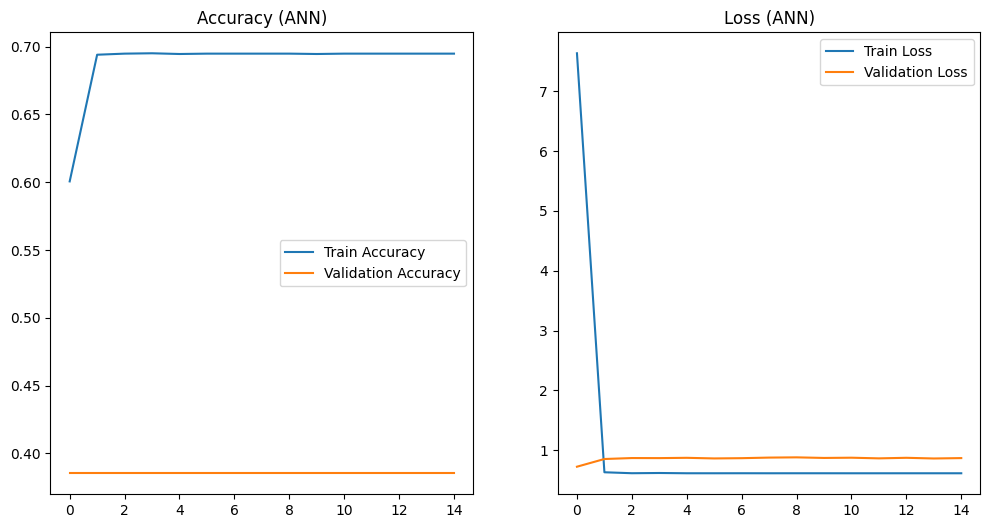

In [11]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy (ANN)')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss (ANN)')
plt.show()


In [12]:
# Generate Classification Report
y_pred = np.argmax(model_ann.predict(X_test), axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred))


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       979
           1       0.25      1.00      0.40       326

    accuracy                           0.25      1305
   macro avg       0.12      0.50      0.20      1305
weighted avg       0.06      0.25      0.10      1305



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


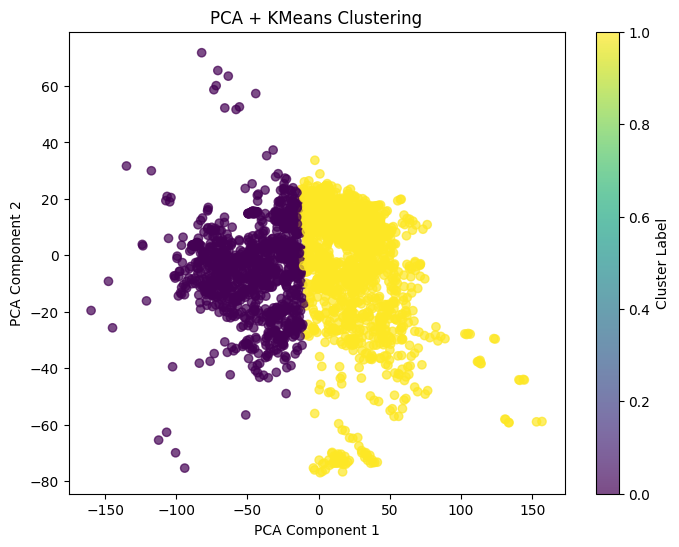

In [13]:
# Flatten images for PCA (same as before for training set)
X_train_flat = np.concatenate([x.numpy().reshape((x.shape[0], -1)) for x, _ in train_ds])

# Normalize the data
X_train_flat = X_train_flat / 255.0

# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  # Reduce to 50 components
X_pca = pca.fit_transform(X_train_flat)

# Apply KMeans clustering to the PCA-transformed data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Visualize the clustering result using the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("PCA + KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()